<a href="https://colab.research.google.com/github/ankitkhairwajaat/Car-Price-Prediction/blob/main/Car_Price_Prediction(Linear_Regression_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Processing

In [ ]:
# Loading car dataset into pandas dataframe
car_df  = pd.read_csv('car data.csv')
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
print(car_df.shape)
print(car_df.ndim)
print(car_df.info())

(301, 9)
2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB
None


In [ ]:
#Checking for null values
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#Checking distribution of Fuel type , Seller Type and Transmission
print(car_df['Fuel_Type'].value_counts())
print(car_df['Seller_Type'].value_counts())
print(car_df['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
#Encoding categorical data using dummy variables
car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}} , inplace=True)
car_df.replace({'Seller_Type':{'Individual':0,'Dealer':1}} , inplace=True)
car_df.replace({'Transmission':{'Automatic':0,'Manual':1}} , inplace=True)
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,1,0
1,sx4,2013,4.75,9.54,43000,1,1,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,0,1,1,0
4,swift,2014,4.60,6.87,42450,1,1,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,1,1,0
297,brio,2015,4.00,5.90,60000,0,1,1,0
298,city,2009,3.35,11.00,87934,0,1,1,0
299,city,2017,11.50,12.50,9000,1,1,1,0


In [ ]:
#assigning data to predictor and predicted variables
X = car_df.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_df['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            1             1   
1    2013           9.54       43000          1            1             1   
2    2017           9.85        6900          0            1             1   
3    2011           4.15        5200          0            1             1   
4    2014           6.87       42450          1            1             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            1             1   
297  2015           5.90       60000          0            1             1   
298  2009          11.00       87934          0            1             1   
299  2017          12.50        9000          1            1             1   
300  2016           5.90        5464          0            1             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
#Splitting the data into training and testing set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state = 2)

Model Training with Linear Regression

In [ ]:
#Loading the linear Regression model
lin_reg = LinearRegression()

In [ ]:
#Fitting the data with Linear Regression model
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#Predicting using training variables
train_pred = lin_reg.predict(X_train)


In [ ]:
#Caculating Rsquared error using training dataset
error = metrics.r2_score(Y_train,train_pred)
print(f' R squared error is {error} ')

 R squared error is 0.8799451660493716 


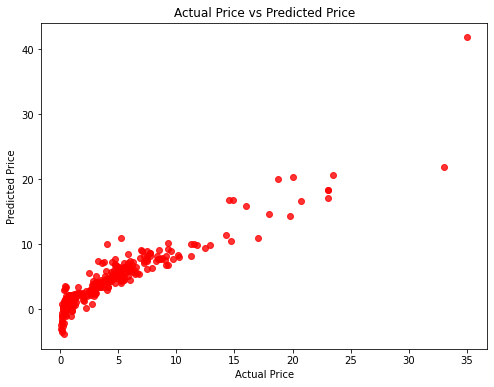

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(Y_train,train_pred,color='red',alpha=0.8)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [ ]:
#Predicting using testing variables
test_pred = lin_reg.predict(X_test)

In [ ]:
#Calculating R squared error of testing dataset
e_test = metrics.r2_score(Y_test,test_pred)
print(f' R squared error is {e_test} ')

 R squared error is 0.8365766715027171 


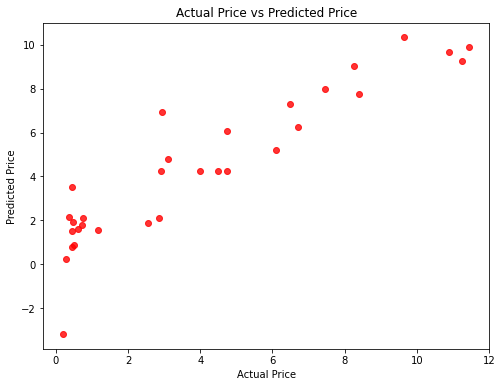

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(Y_test,test_pred,color='red',alpha=0.8)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()